# Applied Data Science 1

### Student Name: Oluwatoba Adeoye

### Student ID: 23032031

# Clustering and Fitting with Customer Data 
This project attempt to create clusters (grouping) of customers based on their shopping behaviour. This is useful for shopping malls and e-commerce business to track the behaviour of their customers and allow them to effectively devise strategy to drive sales.  


## Preliminary operations before loading data

In [1]:
# Import necessary Python libraries

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

# Machine learning libraries 

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
import scipy.cluster.hierarchy as shc
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d 
from scipy.optimize import curve_fit
from numpy.polynomial import Polynomial as Poly

# Suppress warnings
import warnings 
warnings.filterwarnings("ignore")

# Import Plotly after other plotting libraries to avoid conflicts
import plotly as py 
import plotly.graph_objs as go 

In [2]:
# Load the dataset using Pandas 

Mall_data = pd.read_csv("Mall_Customers.csv") 

# Print the first 10 observations 
Mall_data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## Basic Preprocessing 

In this section, we will take a quick glance at the data, checking for missing values, summary statistics and any basic statiscal analysis needed before moving on to exploratory data in the sections after. 
All these are necessary to ensure we are loading in the data in the correct format and to avoid errors during clustering. 

In [3]:
# Quick summary statistics 

Mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [4]:
Mall_data.groupby('Gender').min()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,3,18,16,5
Male,1,18,15,1


In [5]:
# Checking the size of variables and observations

Mall_data.shape

(200, 5)

In [6]:
# Checking data type of each column

Mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Check for missing values in the entire dataset
missing_values = Mall_data.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


Data contains no null values. so we proceed with our analysis

## Exploratory Data Analysis 

We will be using data visualisation to see if there is any pattern between consumers spending behaviour.

## Categorical Graph

In [8]:
# Create a function to plot 

def plot_gender_distribution(data):
    """
    Plots the gender distribution from the provided DataFrame as a pie chart.

    Parameters:
        data (DataFrame): The DataFrame containing gender information.

    Returns:
        None
    """
    plt.figure(figsize=(12, 6)) # Create a figure

    # Plotting the pie chart
    gender_counts = data['Gender'].value_counts() # Count the occurrences of each gender
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90) # Create pie chart
    plt.title('Gender Distribution') # Set title for the pie chart

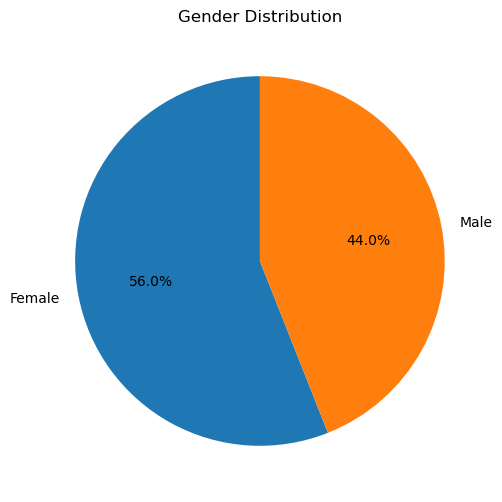

In [9]:
plot_gender_distribution(Mall_data)  

plt.savefig("pie_chart.png")

plt.show()

There are more Female shoppers (56%) compared to Male shoppers (44%)

In [10]:
def plot_gender_distribution(data):
    """
    Plots the gender distribution from the provided DataFrame as a bar chart.

    Parameters:
        data (DataFrame): The DataFrame containing gender information.

    Returns:
        None
    """
    plt.figure(figsize=(10, 6)) # Create a figure
    
    # Plotting the count plot
    sns.countplot(data=data, x='Gender')  # Create count plot
    plt.title('Gender Count')  # Set title for the count plot
    plt.xlabel('Gender')  # Set label for x-axis of the count plot

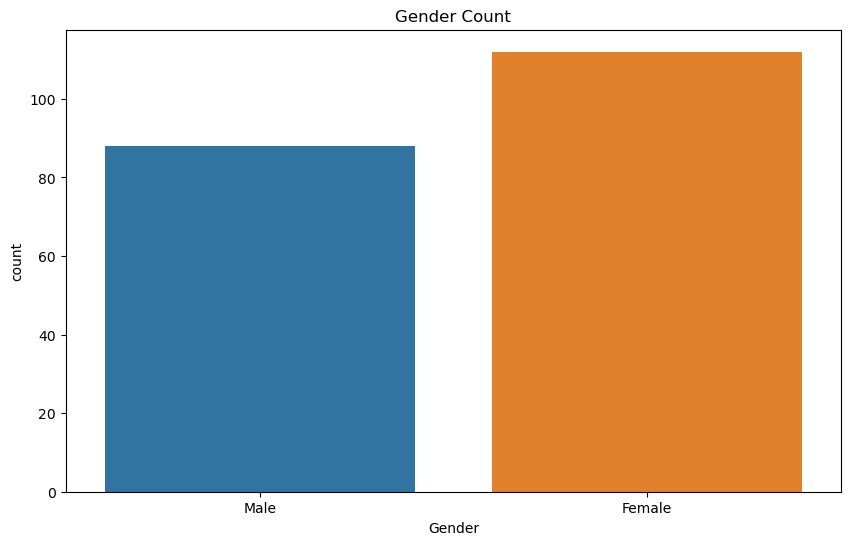

In [11]:
plot_gender_distribution(Mall_data)  

plt.savefig("bar_chart.png")

plt.show()

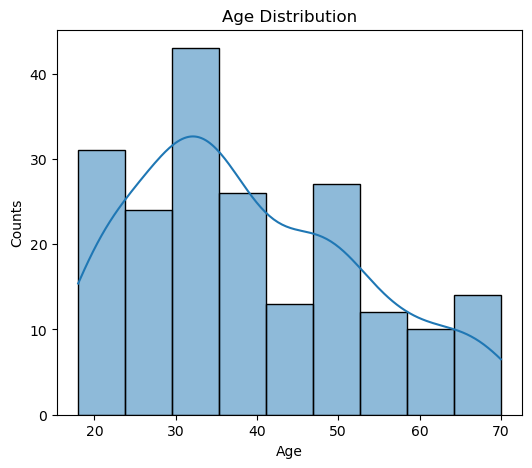

In [12]:
def plot_histogram(Mall_data, column= 'Age', kde=False, title=None):
    """
    Plots distribution plots (histogram and KDE) for the specified columns of the provided DataFrame

    Parameters:
        data (DataFrame): Pandas DataFrame containing the data.
        column (str): Column name for which the histogram is to be plotted.
        kde (bool): Whether to plot a kernel density estimate (KDE).
        title (str): Title of the plot.

    Returns:
        None; displays the histogram.
    """
    plt.figure(figsize=(6, 5))
    sns.histplot(Mall_data['Age'], kde=True)
    plt.title(title if title else f'{column} Distribution')
    plt.xlabel('Age')
    plt.ylabel('Counts')
    plt.savefig('dist_plot.png')
    plt.show()
    
plot_histogram(Mall_data, column= 'Age', kde=False, title=None)

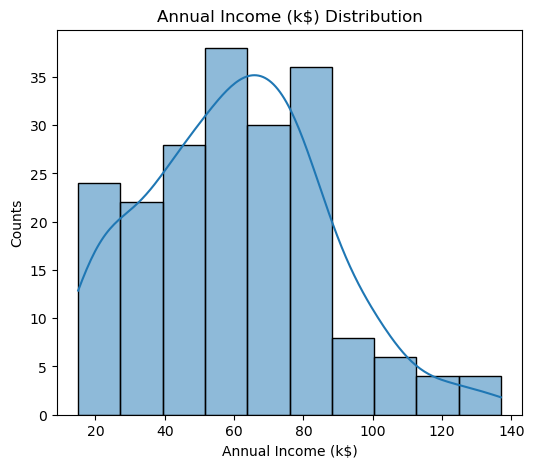

In [13]:
def plot_histogram2(Mall_data, column= 'Annual Income (k$)', kde=False, title=None):
    """
    Plots distribution plots (histogram and KDE) for the specified columns of the provided DataFrame.
    
    Parameters:
        data (DataFrame): Pandas DataFrame containing the data.
        column (str): Column name for which the histogram is to be plotted.
        kde (bool): Whether to plot a kernel density estimate (KDE).
        title (str): Title of the plot.

    Returns:
        None; displays the histogram.
    """
    plt.figure(figsize=(6, 5))
    sns.histplot(Mall_data['Annual Income (k$)'], kde=True)
    plt.title(title if title else f'{column} Distribution')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Counts')
    plt.savefig('dist_plot2.png')
    plt.show()
    
plot_histogram2(Mall_data, column= 'Annual Income (k$)', kde=False, title=None)

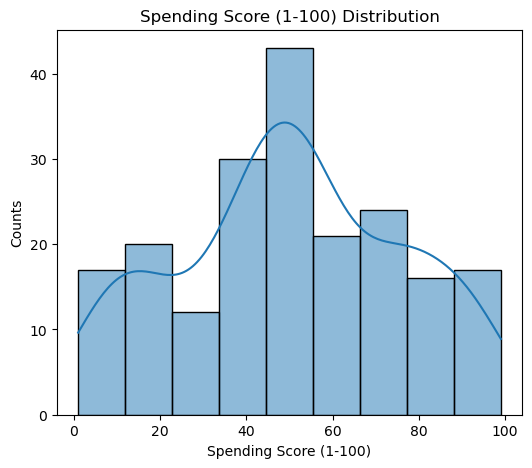

In [14]:
def plot_histogram3(Mall_data, column= 'Spending Score (1-100)', kde=False, title=None):
    """
    Plots distribution plots (histogram and KDE) for the specified columns of the provided DataFrame.
    
    Parameters:
        data (DataFrame): Pandas DataFrame containing the data.
        column (str): Column name for which the histogram is to be plotted.
        kde (bool): Whether to plot a kernel density estimate (KDE).
        title (str): Title of the plot.

    Returns:
        None; displays the histogram.
    """
    plt.figure(figsize=(6, 5))
    sns.histplot(Mall_data['Spending Score (1-100)'], kde=True)
    plt.title(title if title else f'{column} Distribution')
    plt.xlabel('Spending Score (1-100)')
    plt.ylabel('Counts')
    plt.savefig('dist_plot3.png')
    plt.show()
    
plot_histogram3(Mall_data, column= 'Spending Score (1-100)', kde=False, title=None)

The variables follows a normal distribution. However, spending score is tri-modal as evidenced from the chart above.

## Exploring Relationship Between Variables using scatterplot 

## Relational Graph

In [15]:
def plot_scatter_matrix(data, drop_columns=[], hue=None, palette='Set1'):
    """
    Creates scatter plots for each pair of variables in the provided DataFrame, optionally colored by a hue variable.

    Parameters:
        data (DataFrame): The DataFrame containing the data to be plotted.
        drop_columns (list, optional): A list of column names to be dropped before plotting.
        hue (str, optional): A variable in the data to color the points by.
        palette (str or list of colors, optional): Set the color palette for the plot.

    Returns:
        None
    """
    # Drop unnecessary columns
    X = data.drop(drop_columns, axis=1)

    # Create scatter plots for each pair of variables
    for i, col1 in enumerate(X.columns):
        for j, col2 in enumerate(X.columns):
            if i < j:  # To avoid plotting the same variable against itself and plotting duplicates
                plt.figure(figsize=(6, 4))
                sns.scatterplot(data=data, x=col1, y=col2, hue=hue, palette=palette)
                plt.title(f'{col1} vs {col2}')
                plt.xlabel(col1)
                plt.ylabel(col2)
                if hue:
                    plt.legend(title=hue)
                plt.tight_layout()

    plt.show()

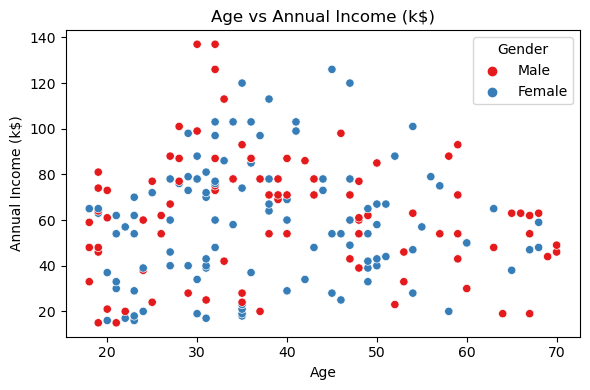

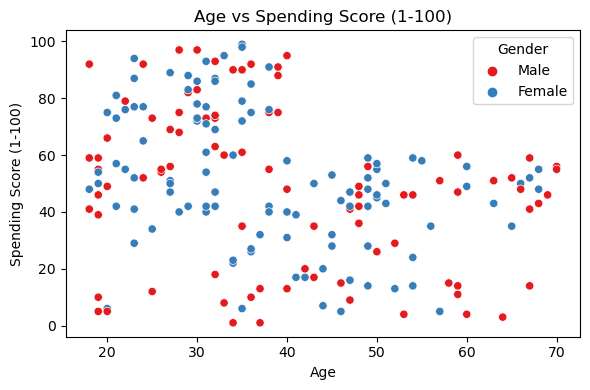

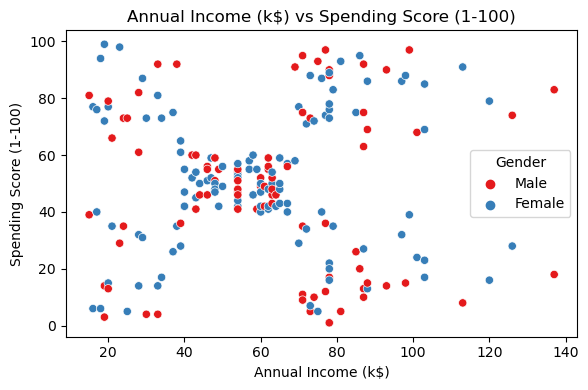

In [16]:
plot_scatter_matrix(Mall_data, drop_columns=['CustomerID', 'Gender'], hue='Gender')

### Scatter plot with trend line

In [18]:
def fit_line(Mall_data, x_column, y_column):
    """
    Fit a line to the data using linear regression and print the slope and intercept.
    
    Parameters:
        df (Dataframe): DataFrame containing the data.
        x_column (str): (int, optional): Name of the column containing the independent variable.
        y_column (str): (int, optional): Name of the column containing the independent variable.

    Returns:
        None
    """
    
    #Extract independent and dependent variables
    x = Mall_data[[x_column]]
    y = Mall_data[y_column]
    
    print("Shape of x:", x.shape)  # Printing the shape of X to check it's 2D
    print("Shape of y:", y.shape)  # Printing the shape of y to check it's 1D 
    
    #Initialize linear regression model
    model = LinearRegression()
    
    #Fit the model to the data
    model.fit(x, y)
    
    #Get the slope and intercept of the fitted line 
    slope = model.coef_[0]
    intercept = model.intercept_
    
    #print the slope and intercept
    print("Slope:", slope)
    print("Intercept:", intercept)
    
#Specify the columns for independent and dependent variables
x_column = 'Annual Income (k$)'
y_column = 'Spending Score (1-100)'

#Fit the line to the data and print the result 
fit_line(Mall_data, x_column, y_column)


Shape of x: (200, 1)
Shape of y: (200,)
Slope: 0.009736498275606825
Intercept: 49.61035766442925


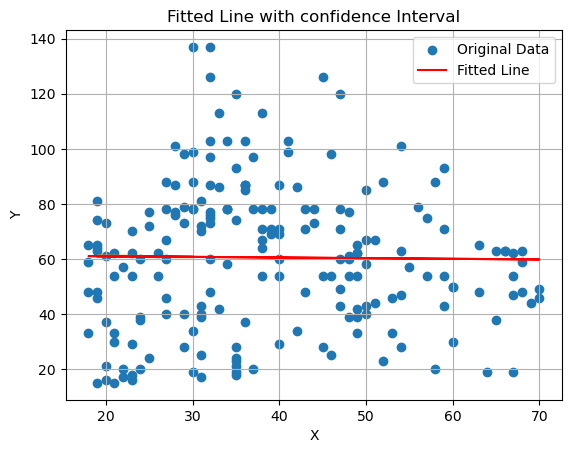

In [19]:
def fit_line(x, y):
    """
    Fits a line to the given data points.
    
    Args:
    - x (array-like): Independent variable.
    - y (array-like): Dependent variable.

    Returns:
    - slope (float): Slope of the fitted line.
    - intercept (float): Intercept of the fitted line.
    """
    
    slope, intercept, slope_stderr, intercept_stderr, _ = linregress (x, y)
    return slope, intercept, slope_stderr, intercept_stderr

def plot_fitted_line(x, y, slope, intercept, slope_stderr, intercept_stderr):
    """
    Plots the original data points along with the fitted line and confidence intervals.
    
    Args:
    - x (array-like): Independent variable.
    - y (array-like): Dependent variable.

    Returns:
    - slope (float): Slope of the fitted line.
    - intercept (float): Intercept of the fitted line.
    - slope_stderr (float): Standard error of the slope.
    - intercept_stderr (float): Standard error of the intercept.
    """
    
    plt.scatter(x, y, label='Original Data')
    plt.plot(x, slope * x + intercept, color='red', label='Fitted Line')
    plt.fill_between(x, (slope - slope_stderr) * x + (intercept - intercept_stderr), (slope + slope_stderr) * x + (intercept + intercept_stderr))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Fitted Line with confidence Interval')
    plt.legend()
    plt.grid(True)
    plt.show()
    
#Extract relevant columns for fitting
x = Mall_data['Age'].values
y = Mall_data['Annual Income (k$)'].values

#Fit a line to the data
slope, intercept, slope_stderr, intercept_stderr = fit_line(x, y)

#plot the fitted line with confidence intervals
plot_fitted_line(x, y, slope, intercept, slope_stderr, intercept_stderr)

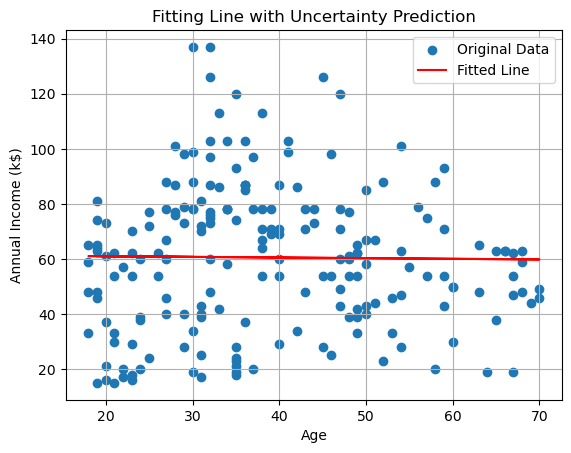

In [20]:
def fit_line(x, y):
    """
    Fits a line to the given data points and calculate uncertainies.
    
    Args:
    - x (array-like): Independent variable.
    - y (array-like): Dependent variable.

    Returns:
    - slope (float): Slope of the fitted line.
    - intercept (float): Intercept of the fitted line.
    - slope_stderr (float): Standard error of the slope.
    - intercept_stderr (float): Standard error of the intercept.
    """
    
    slope, intercept, slope_stderr, intercept_stderr, _ = linregress (x, y)
    return slope, intercept, slope_stderr, intercept_stderr

def plot_fitted_line_with_uncertainty(x, y, slope, intercept, slope_stderr, intercept_stderr, num_prediction=20):
    """
    Plots the original data points along with the fitted line and uncertainty predictions.
    
    Args:
    - x (array-like): Independent variable.
    - y (array-like): Dependent variable.
    - slope (float): Slope of the fitted line.
    - intercept (float): Intercept of the fitted line.
    - slope_stderr (float): Standard error of the slope.
    - intercept_stderr (float): Standard error of the intercept.
    
    Returns:
    None
    
    """
    plt.scatter(x, y, label='Original Data')
    plt.plot(x, slope * x + intercept, color='red', label='Fitted Line')
    
    for _ in range(num_prediction):
        #Generate random uncertainties based on standard errors, ensuring scale parameter is non-negative
        slope_uncertainty = max(0, slope_stderr) * np.random.randn(len(x))
        intercept_uncertainty = max(0, intercept_stderr) * np.random.randn(len(x))
        
        #Generate prediction with uncertainties
        prediction = slope * x + intercept + slope_uncertainty * x + intercept_uncertainty
        
        #plot prediction with uncertainties
        plt.plot(x, prediction, color='blue', alpha=0.0)
        
    plt.xlabel('Age')
    plt.ylabel('Annual Income (k$)')
    plt.title('Fitting Line with Uncertainty Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()
    
#Load data (replace 'mall_customers.csv' with th actual filename of your data)
Mall_data = pd.read_csv("Mall_Customers.csv")

#Extract relevant column for fitting
x = Mall_data['Age'].values
y = Mall_data['Annual Income (k$)'].values

#Fit a line to the data
slope, intercept, slope_stderr, intercept_stderr = fit_line(x, y)

#plot the fitted line with uncertainty predictions
plot_fitted_line_with_uncertainty(x, y, slope, intercept, slope_stderr, intercept_stderr)   

Coefficient (a): 41.389876631834966
Coefficient (b): -0.0005965948681476399


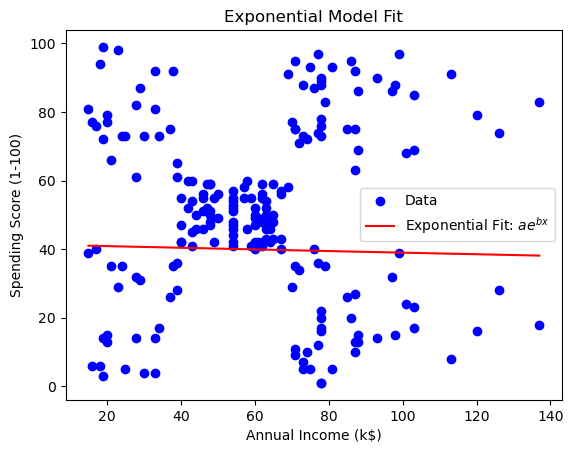

Coefficient (a): 48.53553014445806
Coefficient (b): 0.41701634687672856


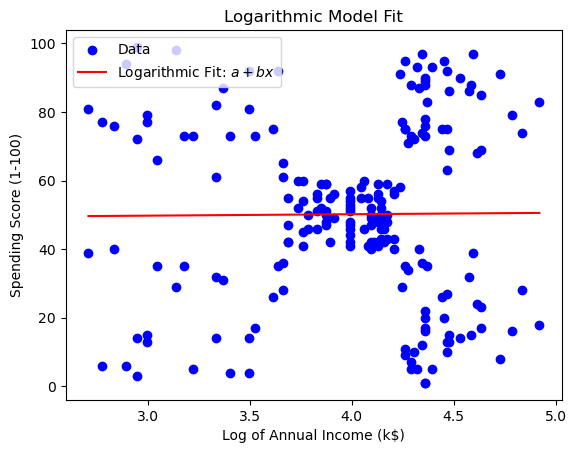

In [21]:
def fit_exponential(Mall_data, x_column, y_column):
    """
    Fit an exponential model to the data.
    
    Parameters:
        Mall_data (DataFrame): DataFrame containing the data.
        x_column (str): Name of the column containing the independent variable.
        y_column (str): Name of the column containing the dependent variable.

    Returns:
        None
    """
    x = Mall_data[x_column].values.reshape(-1, 1)  # Simplifying column selection
    y = Mall_data[y_column]
    y = y.replace(0, np.finfo(float).eps)  # Handling zero values for log

    # Transform y using the natural logarithm
    y_transformed = np.log(y)

    # Initialize linear regression model
    model = LinearRegression()

    # Fit the model to the transformed data
    model.fit(x, y_transformed)

    # Retrieve the coefficients
    b = model.coef_[0]
    log_a = model.intercept_

    # Convert log_a back to a
    a = np.exp(log_a)

    # Print the parameters
    print(f"Coefficient (a): {a}")
    print(f"Coefficient (b): {b}")

    # Plotting the model fit
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, a * np.exp(b * x), color='red', label='Exponential Fit: $a e^{bx}$')
    plt.title('Exponential Model Fit')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.show()

def fit_logarithmic(Mall_data, x_column, y_column):
    """
    Fit a logarithmic model to the data.
    
    Parameters:
        Mall_data (DataFrame): DataFrame containing the data.
        x_column (str): Name of the column containing the independent variable.
        y_column (str): Name of the column containing the dependent variable.

    Returns:
        None
    """
    x = Mall_data[x_column]
    x = x.replace(0, np.finfo(float).eps)  # Handling zero values for log
    x_transformed = np.log(x).values.reshape(-1, 1)

    y = Mall_data[y_column]

    # Initialize linear regression model
    model = LinearRegression()

    # Fit the model to the transformed data
    model.fit(x_transformed, y)

    # Get the slope and intercept of the fitted line
    b = model.coef_[0]
    a = model.intercept_

    # Print the parameters
    print(f"Coefficient (a): {a}")
    print(f"Coefficient (b): {b}")

    # Plotting the model fit
    plt.scatter(x_transformed, y, color='blue', label='Data')
    plt.plot(x_transformed, a + b * x_transformed, color='red', label='Logarithmic Fit: $a + bx$')
    plt.title('Logarithmic Model Fit')
    plt.xlabel(f'Log of {x_column}')
    plt.ylabel(y_column)
    plt.legend()
    plt.show()

fit_exponential(Mall_data, x_column, y_column)
fit_logarithmic(Mall_data, x_column, y_column)

In [22]:
def plot_regression_matrix(data, features=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    """
    Plots regression plots for each pair of features in the provided DataFrame.

    Parameters:
        data (DataFrame): The DataFrame containing the data to be plotted.
        features (list, optional): A list of feature names to be used for plotting.

    Returns:
        None
    """
    plt.figure(1, figsize=(15, 7))
    n = 0
    for x in features:
        for y in features:
            n += 1
            plt.subplot(3, 3, n)
            plt.subplots_adjust(hspace=0.5, wspace=0.5)
            sns.regplot(x=x, y=y, data=data)
            plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y)

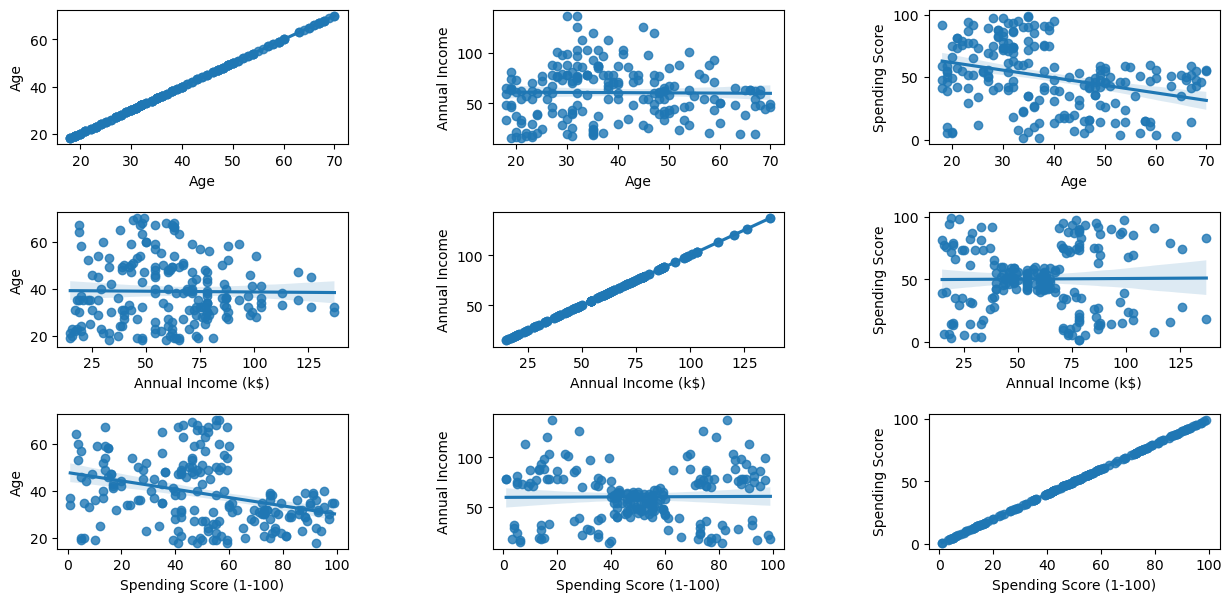

In [23]:
plot_regression_matrix(Mall_data)

plt.savefig('reg_plot.png')

plt.show()

The information that can be gathered from the above visuals is as follows: <br> 1. Younger folks tend to have a higher spending score. <br> 2. Age is not a predictor of Annual income. <br> 3. There is no correlation between spending score and annual income.


### Statistical Graph 

Violin Plot 

In [24]:
def plot_gender_distribution_violin_swarm(data):
    """
    Plots violin plots and swarm plots to visualize the distribution of Age, Annual Income, and Spending Score by Gender.

    Parameters:
        data (DataFrame): The DataFrame containing the data to be plotted.

    Returns:
        None
    """
    plt.figure(figsize=(15, 7))

    # Vertical Violin plot and Swarm plot for Age
    plt.subplot(1, 3, 1)
    sns.violinplot(y='Age', x='Gender', data=data, inner=None)
    sns.swarmplot(y='Age', x='Gender', data=data, color='k', alpha=0.5)
    plt.title('Age Distribution by Gender')
    plt.ylabel('Age (years)')

    plt.tight_layout()
    plt.show()


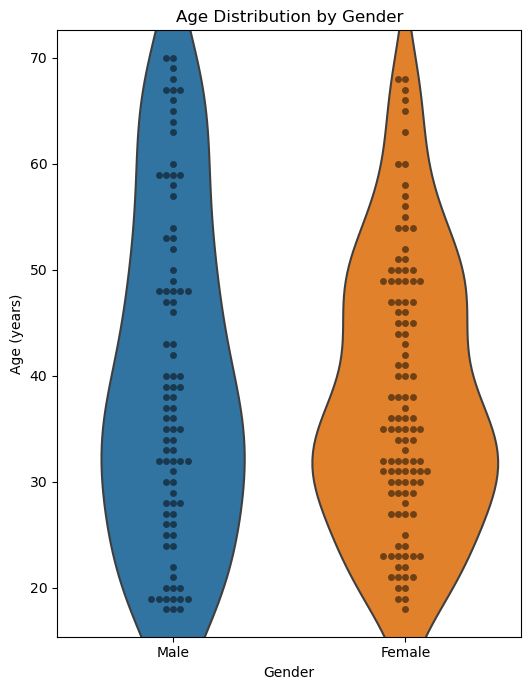

In [25]:
plot_gender_distribution_violin_swarm(Mall_data)

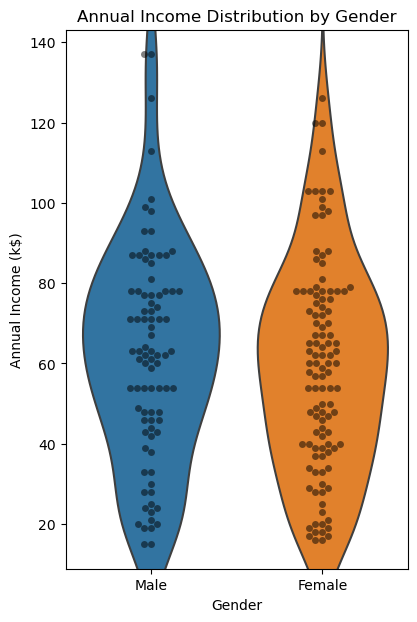

In [26]:
def plot_gender_distribution_violin_swarm2(data):
    """
    Plots violin plots and swarm plots to visualize the distribution of Age, Annual Income, and Spending Score by Gender.

    Parameters:
        data (DataFrame): The DataFrame containing the data to be plotted.

    Returns:
        None
    """
    plt.figure(figsize=(15, 7))
    
    # Vertical Violin plot and Swarm plot for Annual Income
    plt.subplot(1, 3, 2)
    sns.violinplot(y='Annual Income (k$)', x='Gender', data=data, inner=None)
    sns.swarmplot(y='Annual Income (k$)', x='Gender', data=data, color='k', alpha=0.5)
    plt.title('Annual Income Distribution by Gender')
    plt.ylabel('Annual Income (k$)')
    
plot_gender_distribution_violin_swarm2(Mall_data)


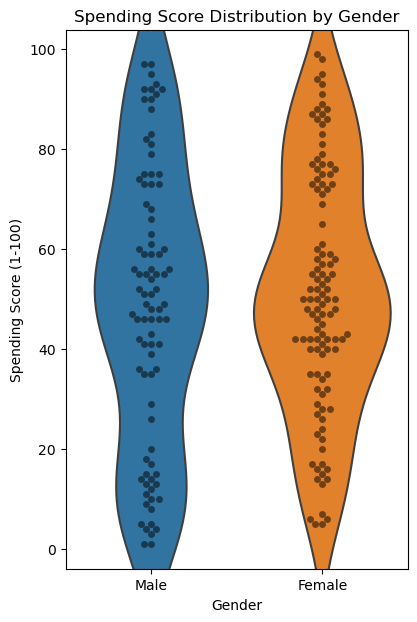

In [27]:
def plot_gender_distribution_violin_swarm3(data):
    """
    Plots violin plots and swarm plots to visualize the distribution of Age, Annual Income, and Spending Score by Gender.

    Parameters:
        data (DataFrame): The DataFrame containing the data to be plotted.

    Returns:
        None
    """
    plt.figure(figsize=(15, 7))
    # Vertical Violin plot and Swarm plot for Spending Score
    plt.subplot(1, 3, 3)
    sns.violinplot(y='Spending Score (1-100)', x='Gender', data=data, inner=None)
    sns.swarmplot(y='Spending Score (1-100)', x='Gender', data=data, color='k', alpha=0.5)
    plt.title('Spending Score Distribution by Gender')
    plt.ylabel('Spending Score (1-100)')
plot_gender_distribution_violin_swarm3(Mall_data)

In [28]:
# Selecting only numeric columns for skewness, kurtosis, and correlation calculations
numeric_data = Mall_data.select_dtypes(include=['int64', 'float64'])

# Calculating skewness, kurtosis, and basic statistics 
skewness = numeric_data.skew()
kurtosis = numeric_data.kurtosis()
basic_statistics = numeric_data.describe()

# Generating a correlation matrix
correlation_matrix = numeric_data.corr()

# Display skewness, kurtosis, and correlation matrix
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis)
print("Basic Statistics:\n", basic_statistics)
print("Correlation Matrix:\n", correlation_matrix)

Skewness:
 CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64
Kurtosis:
 CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64
Basic Statistics:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000        

In [29]:
def plot_correlation_heatmap(data):
    """
    Plots a heatmap to visualize the correlation matrix of numerical features in the provided DataFrame.
    Additionally, if 'Gender' column is present, it plots boxplots of 'Annual Income (k$)' and 'Spending Score (1-100)'
    against 'Gender'.

    Parameters:
        data (DataFrame): The DataFrame containing the data to be plotted.

    Returns:
        None
    """
    print("Original columns:", data.columns)  # Debug: Print original columns

    # Drop 'CustomerID' if it exists, keep 'Gender' for plotting
    if 'CustomerID' in data.columns:
        data = data.drop(columns=['CustomerID'])
        print("Columns after dropping 'CustomerID':", data.columns)  # Debug: Print columns after drop

    # Check and print the correlation matrix for numerical data
    numeric_data = data.select_dtypes(include=['int64', 'float64'])
    correlation_matrix = numeric_data.corr()
    print("Correlation matrix calculated.")  # Debug
    
    numeric_data.hist(figsize=(10,8), bins=20)
    plt.suptitle('Histogram Distribution of Numerical Data', x=0.5, y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

    # Plotting the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Correlation Matrix")
    plt.show()

    # Check if 'Gender' is still in the DataFrame
    if 'Gender' in data.columns:
        print("Gender column is present.")  # Debug
        plt.figure(figsize=(12, 5))

        # Plotting Gender vs Annual Income
        plt.subplot(1, 2, 1)
        sns.boxplot(x='Gender', y='Annual Income (k$)', data=data)
        plt.title('Gender vs Annual Income')

        # Plotting Gender vs Spending Score
        plt.subplot(1, 2, 2)
        sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data)
        plt.title('Gender vs Spending Score')

        plt.tight_layout()
        plt.show()
    else:
        print("Gender column is not available for plotting.")  # Debug

Original columns: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
Columns after dropping 'CustomerID': Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')
Correlation matrix calculated.


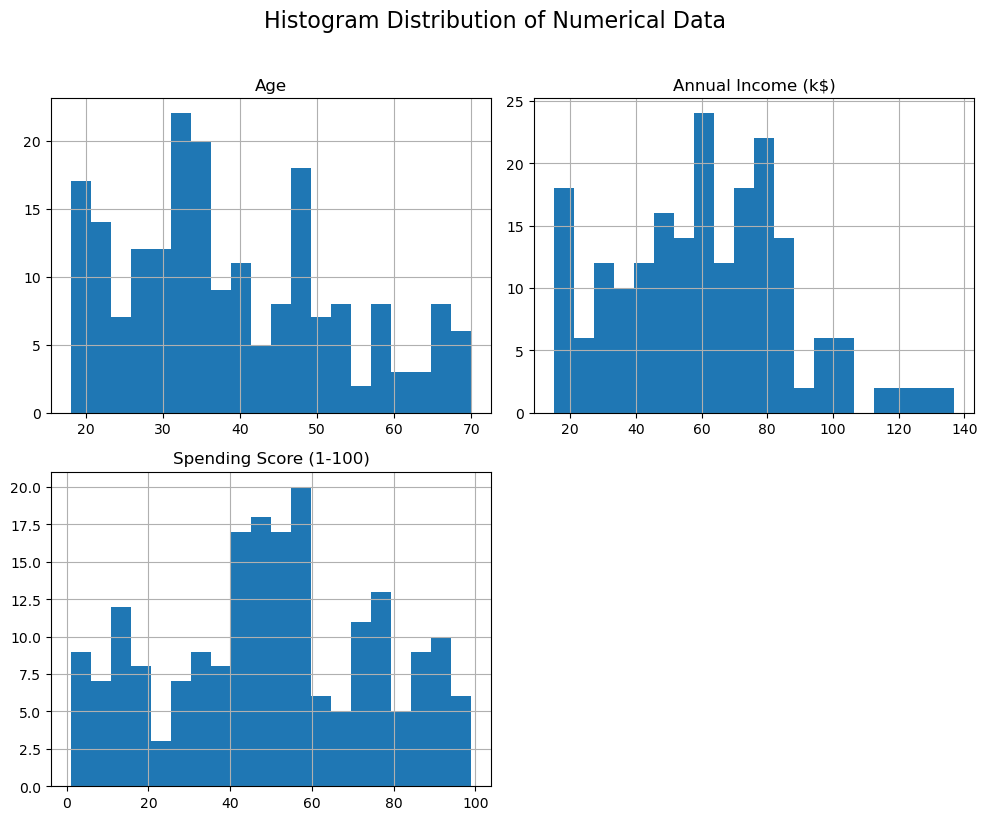

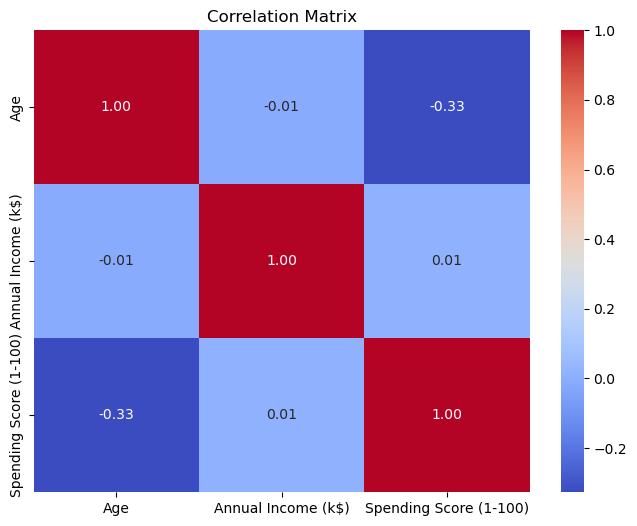

Gender column is present.


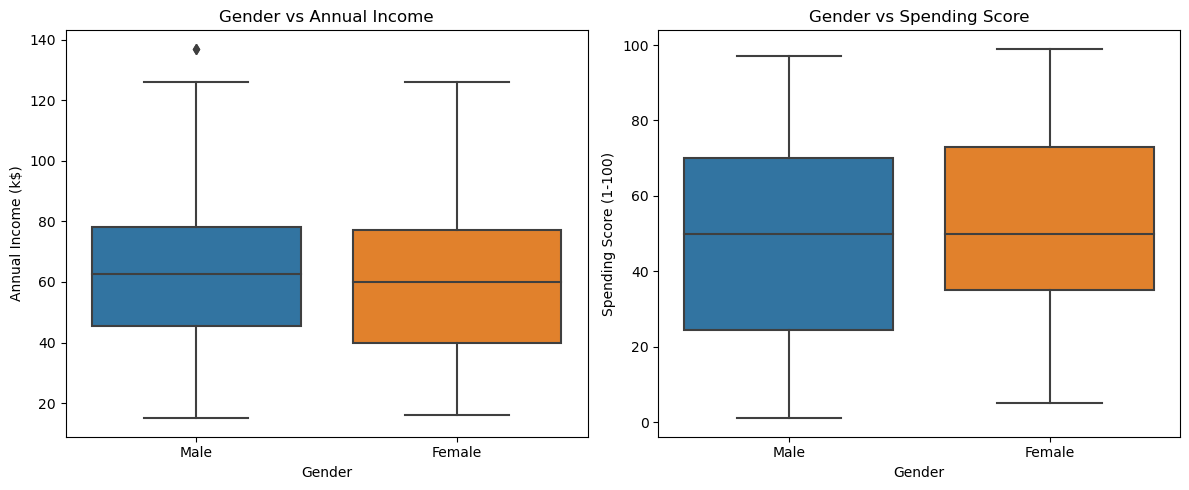

In [30]:
plot_correlation_heatmap(Mall_data)

The heatmap confirms the correlation between variables. <br> Age is not correlated with spending score, but annual income does have an atom of correlation with a users shopping behaviour. 

## Shopping Behaviours Across the two Genders 

In [31]:
def plot_gender_comparison(data):
    """
    Plots point plots to compare 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' between genders.

    Parameters:
        data (DataFrame): The DataFrame containing the data to be plotted.

    Returns:
        None
    """
    plt.figure(figsize=(15, 7))
    for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 1):
        plt.subplot(1, 3, i)
        sns.pointplot(x='Gender', y=col, data=data, capsize=0.1)
        plt.title(f'{col} Comparison')
        plt.ylabel(col if i == 1 else '')

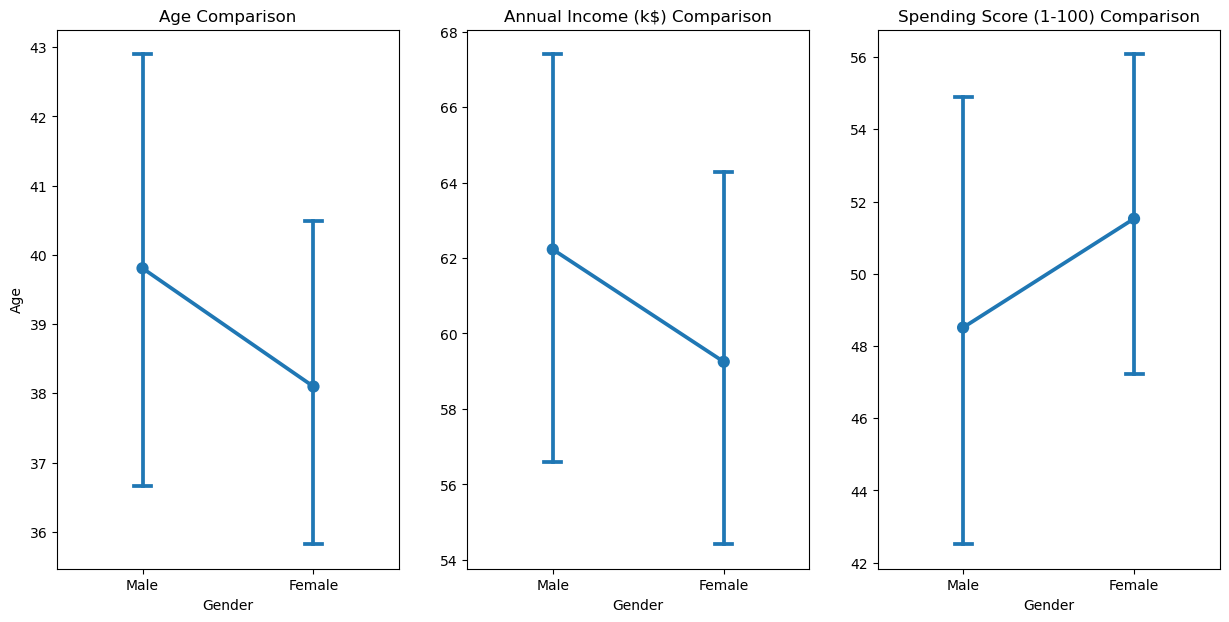

In [32]:
plot_gender_comparison(Mall_data)

plt.savefig('dot_plot.png')

plt.show()

1. The mean age for median age for men is higher than that of female. <br> 2. The annual income for male is higher for Male with a min of c. 56 and a max of c. 67 while for female it ranges from min of c. 40 to a max of c. 55. <br> 3. Despite the higher annual exhibited by Male, the Female recorded a higher spending score than the male. 

## KMeans Clustering  

### Creating a function that evaluates kmeans cluster and plot the results

In [33]:
def evaluate_kmeans_clustering(X):
    """
    Evaluates KMeans clustering using the Elbow Method and Silhouette Score Method.

    Parameters:
        X (array-like or DataFrame): The data to be clustered.

    Returns:
        None
    """
    sse = {}
    sil = []
    kmax = 10

    # Elbow Method and Silhouette Score Method
    for idx, method in enumerate(['Elbow Method', 'Silhouette Score Method'], 1):
        plt.subplot(1, 2, idx)
        for k in range(2, kmax + 1):
            if method == 'Elbow Method':
                kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, algorithm='elkan').fit(X)
                sse[k] = kmeans.inertia_  # Inertia: Sum of distances of samples to their closest cluster center
            elif method == 'Silhouette Score Method':
                kmeans = KMeans(n_clusters=k).fit(X)
                labels = kmeans.labels_
                sil.append(silhouette_score(X, labels, metric='euclidean'))

        if method == 'Elbow Method':
            sns.lineplot(x=list(sse.keys()), y=list(sse.values()))
            plt.ylabel('Sum of Squared Error')
        elif method == 'Silhouette Score Method':
            sns.lineplot(x=range(2, kmax + 1), y=sil)
            plt.ylabel('Silhouette Score')

        plt.title(method)
        plt.xlabel('Number of Clusters')

    plt.tight_layout()
    plt.show()

In [34]:
def silhouette_analysis_kmeans(n_clusters, X, first_feature, second_feature):
    """
    Perform silhouette analysis for KMeans clustering with a specific number of clusters.
    
    Parameters:
    - n_clusters: The number of clusters.
    - X: The data matrix.
    - x_label: Label for the x-axis.
    - y_label: Label for the y-axis.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    
    # Silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, algorithm='elkan').fit(X)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    db_index = davies_bouldin_score(X, cluster_labels)  # Davies-Bouldin index
    
    print("\nFor n_clusters =", n_clusters, ", the silhouette score is %.4f" % silhouette_avg,
          "and the Davies-Bouldin Index is %.4f \n" % db_index)
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.cool(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color,
                          edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # Scatter plot of clustered data
    colors = cm.cool(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker=".", s=250, lw=0, alpha=0.7, c=colors, edgecolor="k")
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel(first_feature)
    ax2.set_ylabel(second_feature)
    
    plt.suptitle("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters,
                 fontsize=14, fontweight="bold")
    
    plt.show()
    
    return silhouette_avg, db_index

In [35]:
def silhouette_analysis_other(algorithm, n_clusters, X, first_feature, second_feature):
    """
    Performs silhouette analysis for clustering algorithms other than KMeans and visualizes the results.

    Parameters:
        algorithm (str): The clustering algorithm to be used ('AgglomerativeClustering' or 'DBSCAN').
        n_clusters (int): The number of clusters to fit the clustering algorithm.
        X (array-like): The data to be clustered.
        first_feature (str): The label for the first feature (x-axis of scatter plot).
        second_feature (str): The label for the second feature (y-axis of scatter plot).

    Returns:
        tuple: A tuple containing the silhouette score and Davies-Bouldin index.
    """
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 7))
    
    # Silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    if algorithm == 'AgglomerativeClustering':
        clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward').fit(X)
    else:
        clusterer = DBSCAN(eps=10, min_samples=3).fit(X)
    
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    db_index = davies_bouldin_score(X, cluster_labels)  # Davies-Bouldin index
    
    print("\nFor n_clusters =", n_clusters, ", the silhouette score is %.4f" % silhouette_avg,
          "and the Davies-Bouldin Index is %.4f \n" % db_index)
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.cool(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color,
                          edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # Scatter plot of clustered data
    colors = cm.cool(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker=".", s=250, lw=0, alpha=0.7, c=colors, edgecolor="k")
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel(first_feature)
    ax2.set_ylabel(second_feature)
    
    # Dendrogram plot
    dendrogram = shc.dendrogram(shc.linkage(X, method='ward'), ax=ax3)
    
    ax3.set_title("Dendrogram")
    ax3.set_xlabel("Customers")
    ax3.set_ylabel("Euclidean distances")
    
    plt.suptitle(f"Silhouette analysis for {algorithm} on sample data with n_clusters = {n_clusters}",
                 fontsize=14, fontweight="bold")
    
    plt.show()
    
    return silhouette_avg, db_index

In [36]:
def plot_3D_scatter(X, default_z=0):
    """
    Plots a 3D scatter plot of the data points.

    Parameters:
        X (array-like): The data to be plotted, expected to have at least two dimensions.
        default_z (int, optional): Default z-axis value if X has only two dimensions. Defaults to 0.

    Returns:
        None
    """
    # Create KMeans object and fit the data
    kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, random_state=42, algorithm='elkan')
    kmeans.fit(X)

    # Get labels for each data point
    labels = kmeans.labels_

    # Plotting the 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extract data points
    x = np.array(X[:, 0])  # Annual Income
    y = np.array(X[:, 1])  # Spending Score
    z = np.array(X[:, 2]) if X.shape[1] > 2 else np.full(X.shape[0], default_z)  # Age or default

    # Plot data points colored by Spending Score
    ax.scatter(x, y, z, c=y, cmap='viridis')

    # Set labels and title
    ax.set_xlabel('Annual Income (k$)')
    ax.set_ylabel('Spending Score (1-100)')
    ax.set_zlabel('Age')
    plt.title('Spending Score (1-100) vs Annual Income (k$) vs Age')

    # Set axes limits
    ax.set_xlim([x.min(), x.max()])
    ax.set_ylim([y.min(), y.max()])
    ax.set_zlim([z.min(), z.max()])

    plt.show()

### Segmentation 

#### 1. Age and Spending Score

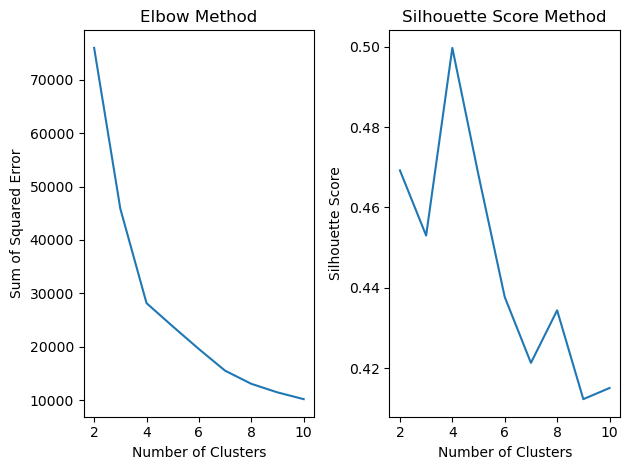

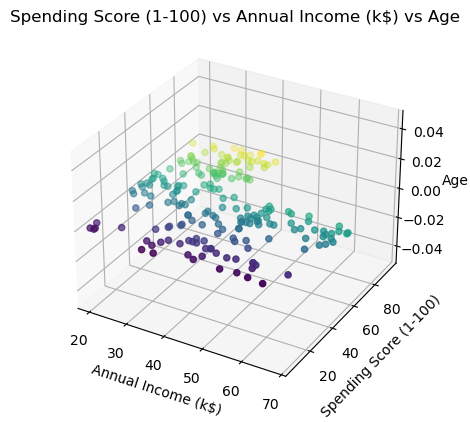


For n_clusters = 4 , the silhouette score is 0.4997 and the Davies-Bouldin Index is 0.6869 



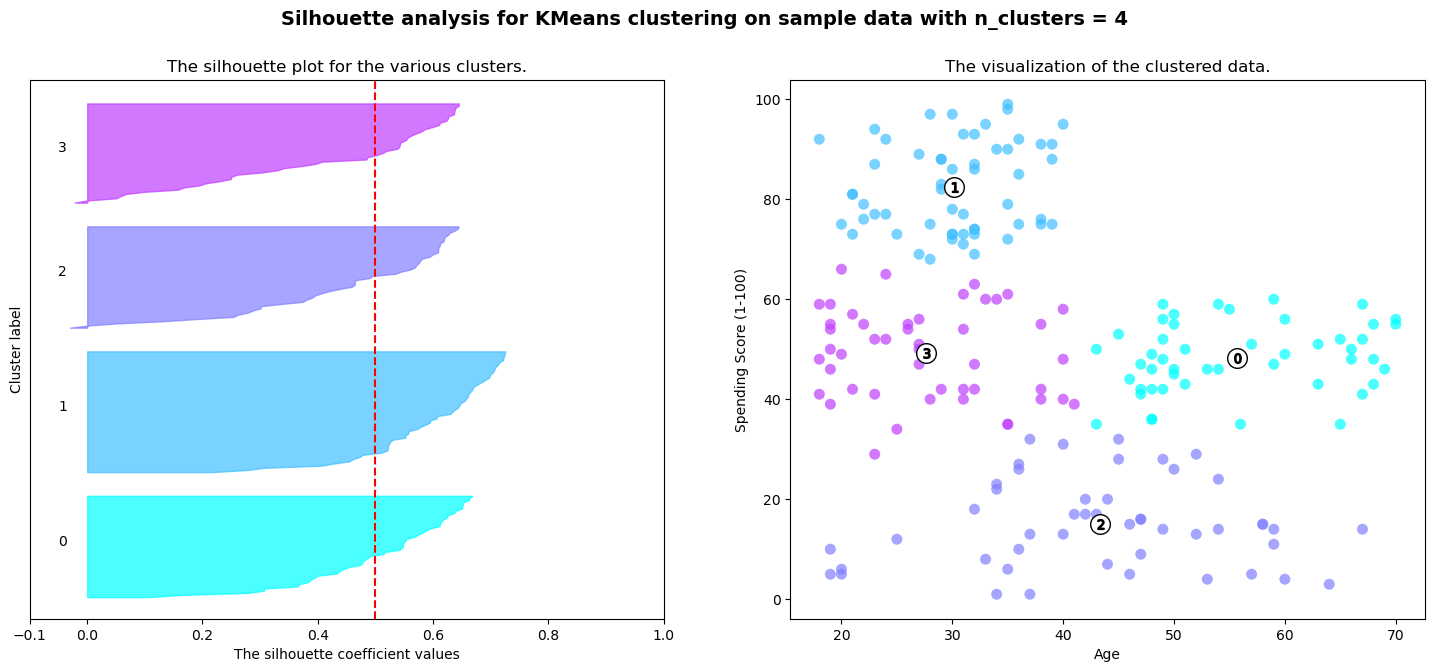

(0.49973941540141753, 0.6869328339833629)

In [37]:
X = Mall_data[['Age', 'Spending Score (1-100)']].values

evaluate_kmeans_clustering(X)

plot_3D_scatter(X)

silhouette_analysis_kmeans(4 , X, 'Age', 'Spending Score (1-100)')

#### 2. Age and Annual Income

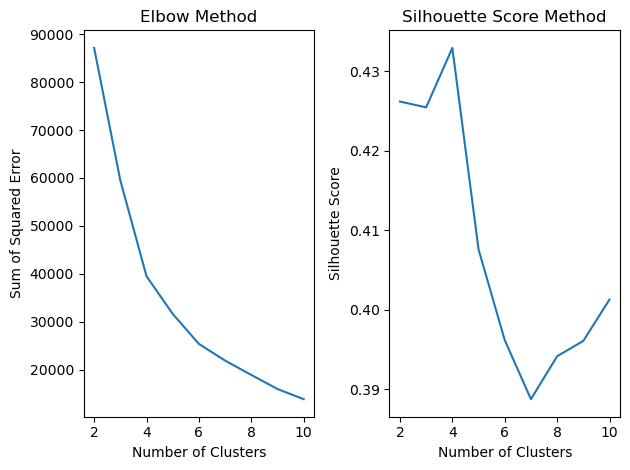

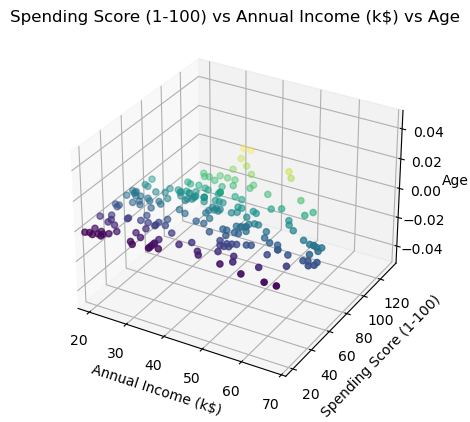


For n_clusters = 4 , the silhouette score is 0.4337 and the Davies-Bouldin Index is 0.7686 



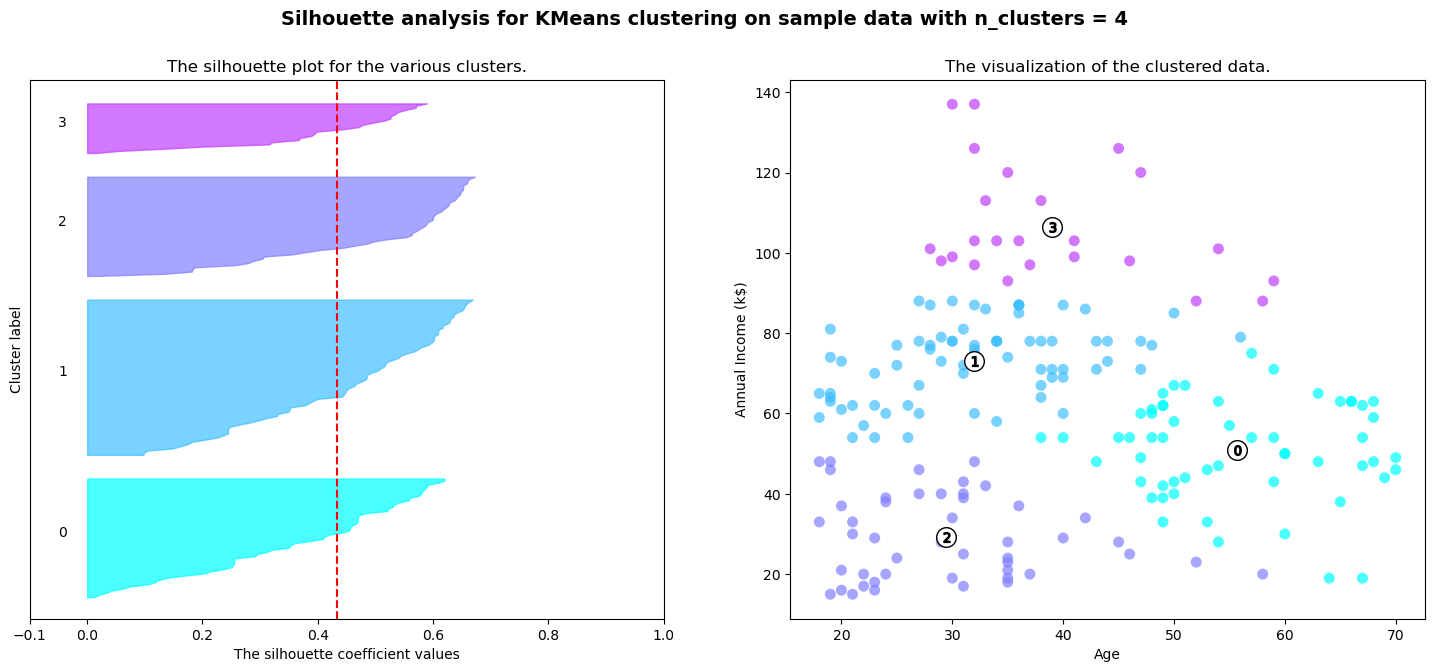

(0.43368606798330267, 0.768601173834188)

In [38]:
Y = Mall_data[['Age', 'Annual Income (k$)']].values

# Evaluate KMeans clustering
evaluate_kmeans_clustering(Y)

plot_3D_scatter(Y)

# Perform silhouette analysis for KMeans clustering with 4 clusters
silhouette_analysis_kmeans(4, Y, 'Age', 'Annual Income (k$)') 

#### 3. Annual Income and Spending Score Segmentation

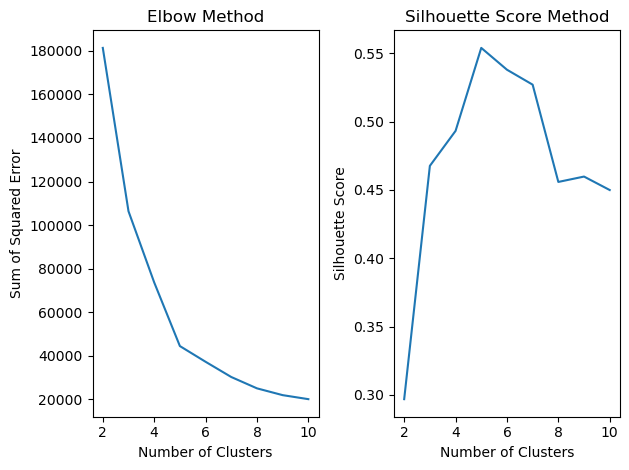

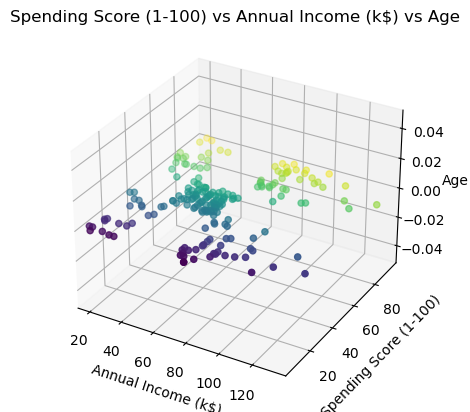


For n_clusters = 5 , the silhouette score is 0.5539 and the Davies-Bouldin Index is 0.5726 



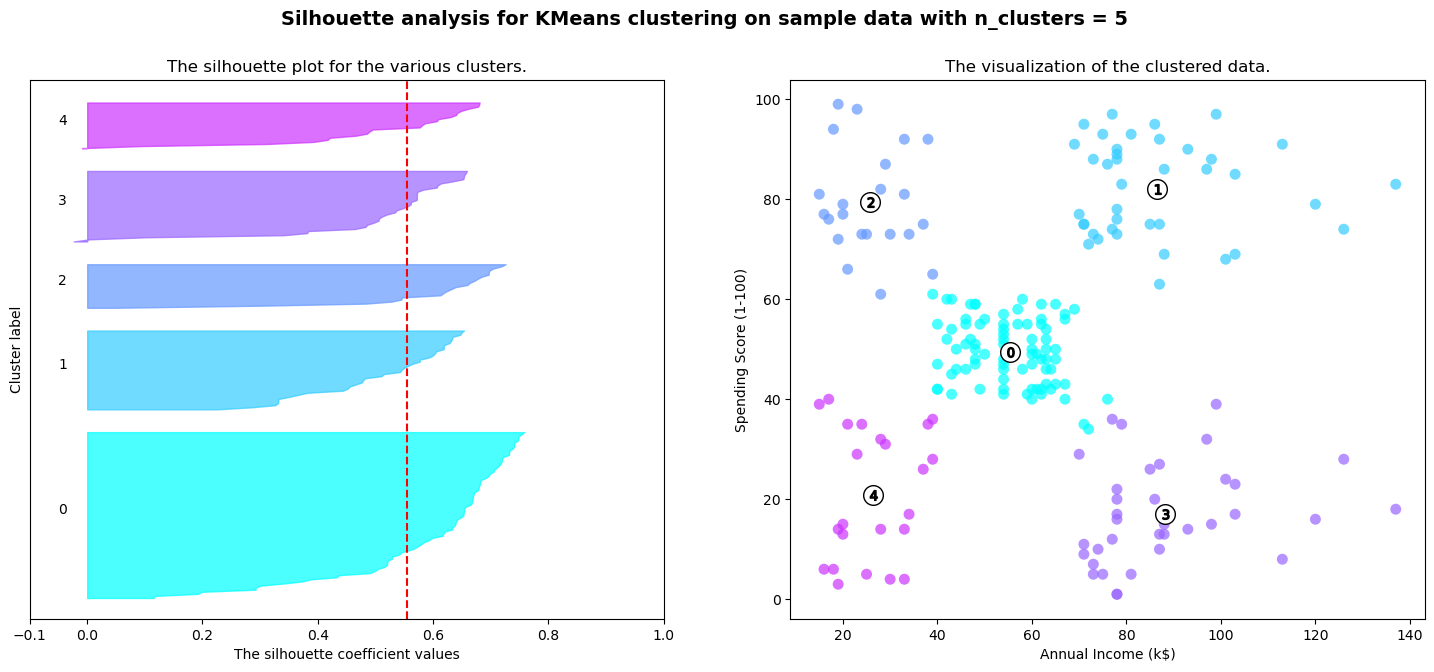

(0.553931997444648, 0.5725628995597086)

In [39]:
Z = Mall_data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Evaluate KMeans clustering
evaluate_kmeans_clustering(Z)

plot_3D_scatter(Z)

# Perform silhouette analysis for KMeans clustering with 4 clusters
silhouette_analysis_kmeans(5, Z, 'Annual Income (k$)', 'Spending Score (1-100)') 


Mean Squared Error: 483.5568217540834


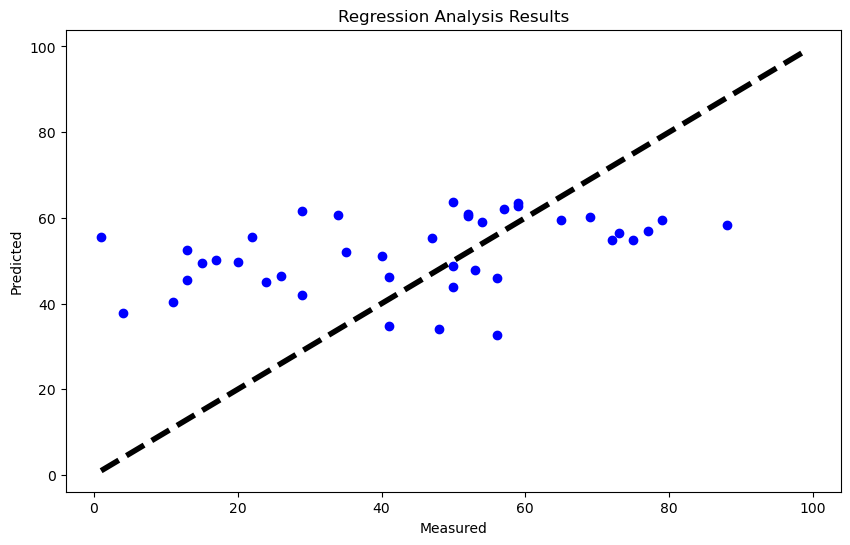

In [40]:
def perform_regression_analysis(Mall_data, predictor_vars, target_var):
    """
    Perform linear regression analysis using specified predictor variables and a target variable.

    Parameters:
        Mall_data (DataFrame): DataFrame containing the data.
        predictor_vars (list of str): List of column names to use as predictors.
        target_var (str): Name of the column to use as the target variable.

    Returns:
        None
    """
    if Mall_data[predictor_vars + [target_var]].isnull().any().any():
        raise ValueError("Input data contains NaN values. Please clean your data before analysis.")

    X = Mall_data[predictor_vars]
    y = Mall_data[target_var]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.title('Regression Analysis Results')
    plt.show()

# Define predictor variables and the target variable
predictor_vars = ['Annual Income (k$)', 'Age']  # Adjust according to your DataFrame columns
target_var = 'Spending Score (1-100)'  # Adjust according to your DataFrame

# Call the function with defined variables
perform_regression_analysis(Mall_data, predictor_vars, target_var)


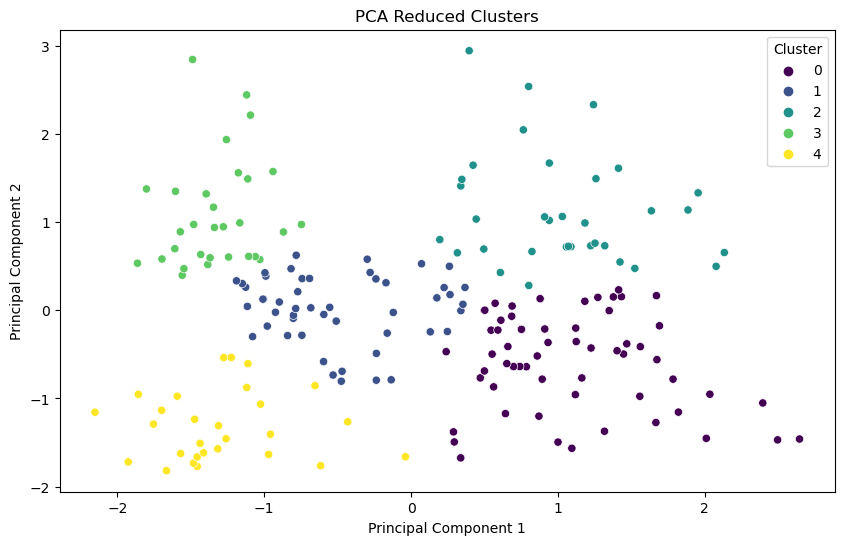

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.92      0.85      0.88        13
           2       1.00      1.00      1.00        10
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         5

    accuracy                           0.93        40
   macro avg       0.95      0.90      0.92        40
weighted avg       0.93      0.93      0.92        40



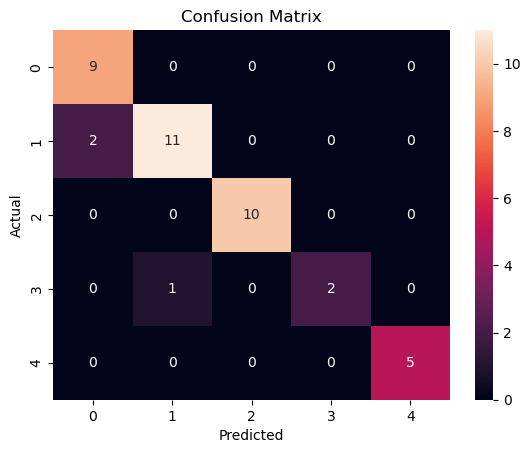

In [41]:
def advanced_clustering_and_classification(Mall_data):
    """
    Perform advanced clustering and then use classification to predict cluster labels.
    
    Parameters:
        Mall_data (DataFrame): DataFrame containing customer data.
        
    Returns:
        None
    """
    # Data preprocessing
    features = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']
    X = Mall_data[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # PCA for dimensionality reduction
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # KMeans Clustering
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(X_pca)
    Mall_data['Cluster'] = kmeans.labels_
    
    # Plotting clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=Mall_data['Cluster'], palette='viridis')
    plt.title('PCA Reduced Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
    
    # Prepare data for classification
    y = Mall_data['Cluster']
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Random Forest for predicting cluster labels
    classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Evaluation
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Assuming Mall_data is loaded and contains the appropriate columns
advanced_clustering_and_classification(Mall_data)

This code defines a function fit_line that fits a line to the data using linear regression and prints the slope and intercept of the fitted line and its functionality